In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import  zscore

In [3]:
missing_value=['?','N/a',np.nan]

In [4]:
df1=pd.read_csv('Switzerland.csv',header=None,na_values=missing_value)
df2=pd.read_csv('Cleavland.csv',header=None,na_values=missing_value)
df3=pd.read_csv('hung.csv',header=None,na_values=missing_value)
df=pd.concat([df1,df2,df3])

In [5]:
df.columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeack','slope','ca','thal','num']

In [6]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeack,slope,ca,thal,num
0,32.0,1.0,1.0,95.0,0.0,NaN,0.0,127.0,0.0,0.7,1.0,NaN,NaN,1
1,34.0,1.0,4.0,115.0,0.0,NaN,NaN,154.0,0.0,0.2,1.0,NaN,NaN,1
2,35.0,1.0,4.0,NaN,0.0,NaN,0.0,130.0,1.0,NaN,NaN,NaN,7.0,3
3,36.0,1.0,4.0,110.0,0.0,NaN,0.0,125.0,1.0,1.0,2.0,NaN,6.0,1
4,38.0,0.0,4.0,105.0,0.0,NaN,0.0,166.0,0.0,2.8,1.0,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52.0,1.0,4.0,160.0,331.0,0.0,0.0,94.0,1.0,2.5,NaN,NaN,NaN,1
290,54.0,0.0,3.0,130.0,294.0,0.0,1.0,100.0,1.0,0.0,2.0,NaN,NaN,1
291,56.0,1.0,4.0,155.0,342.0,1.0,0.0,150.0,1.0,3.0,2.0,NaN,NaN,1
292,58.0,0.0,2.0,180.0,393.0,0.0,0.0,110.0,1.0,1.0,2.0,NaN,7.0,1


In [7]:
df.duplicated().sum()

1

In [8]:
df.shape

(720, 14)

In [9]:
df.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeack,slope,ca,thal,num
0,32.0,1.0,1.0,95.0,0.0,NaN,0.0,127.0,0.0,0.7,1.0,NaN,NaN,1
1,34.0,1.0,4.0,115.0,0.0,NaN,NaN,154.0,0.0,0.2,1.0,NaN,NaN,1
2,35.0,1.0,4.0,NaN,0.0,NaN,0.0,130.0,1.0,NaN,NaN,NaN,7.0,3
3,36.0,1.0,4.0,110.0,0.0,NaN,0.0,125.0,1.0,1.0,2.0,NaN,6.0,1
4,38.0,0.0,4.0,105.0,0.0,NaN,0.0,166.0,0.0,2.8,1.0,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52.0,1.0,4.0,160.0,331.0,0.0,0.0,94.0,1.0,2.5,NaN,NaN,NaN,1
290,54.0,0.0,3.0,130.0,294.0,0.0,1.0,100.0,1.0,0.0,2.0,NaN,NaN,1
291,56.0,1.0,4.0,155.0,342.0,1.0,0.0,150.0,1.0,3.0,2.0,NaN,NaN,1
292,58.0,0.0,2.0,180.0,393.0,0.0,0.0,110.0,1.0,1.0,2.0,NaN,7.0,1


## dataCleaning

In [10]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps      3
chol         23
fbs          83
restecg       2
thalach       2
exang         2
oldpeack      6
slope       207
ca          413
thal        320
num           0
dtype: int64

In [11]:
def clean(data):
    for col in data:
        df[col].fillna(df[col].mean(), inplace=True)
        
clean(df)        

In [12]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeack    0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [13]:
from scipy.stats import zscore

# Calculate Z-score for each column
z_scores = df.apply(zscore)

# Define threshold for outlier detection
threshold = 3  # You can adjust this threshold based on your requirement

# Identify outliers based on threshold
outliers_df = df[(z_scores > threshold) | (z_scores < -threshold)]

# Delete outliers for each column
cleaned_df = df[~((z_scores > threshold) | (z_scores < -threshold)).any(axis=1)]


In [14]:
df.shape

(720, 14)

In [15]:
df=cleaned_df

In [16]:
df.shape

(620, 14)

Correlation with the Target:
age         0.252884
sex         0.286469
cp          0.421978
trestbps    0.032062
chol       -0.371787
fbs         0.243580
restecg     0.133928
thalach    -0.386309
exang       0.369833
oldpeack    0.407719
slope       0.243359
ca          0.298186
thal        0.393709
Name: num, dtype: float64



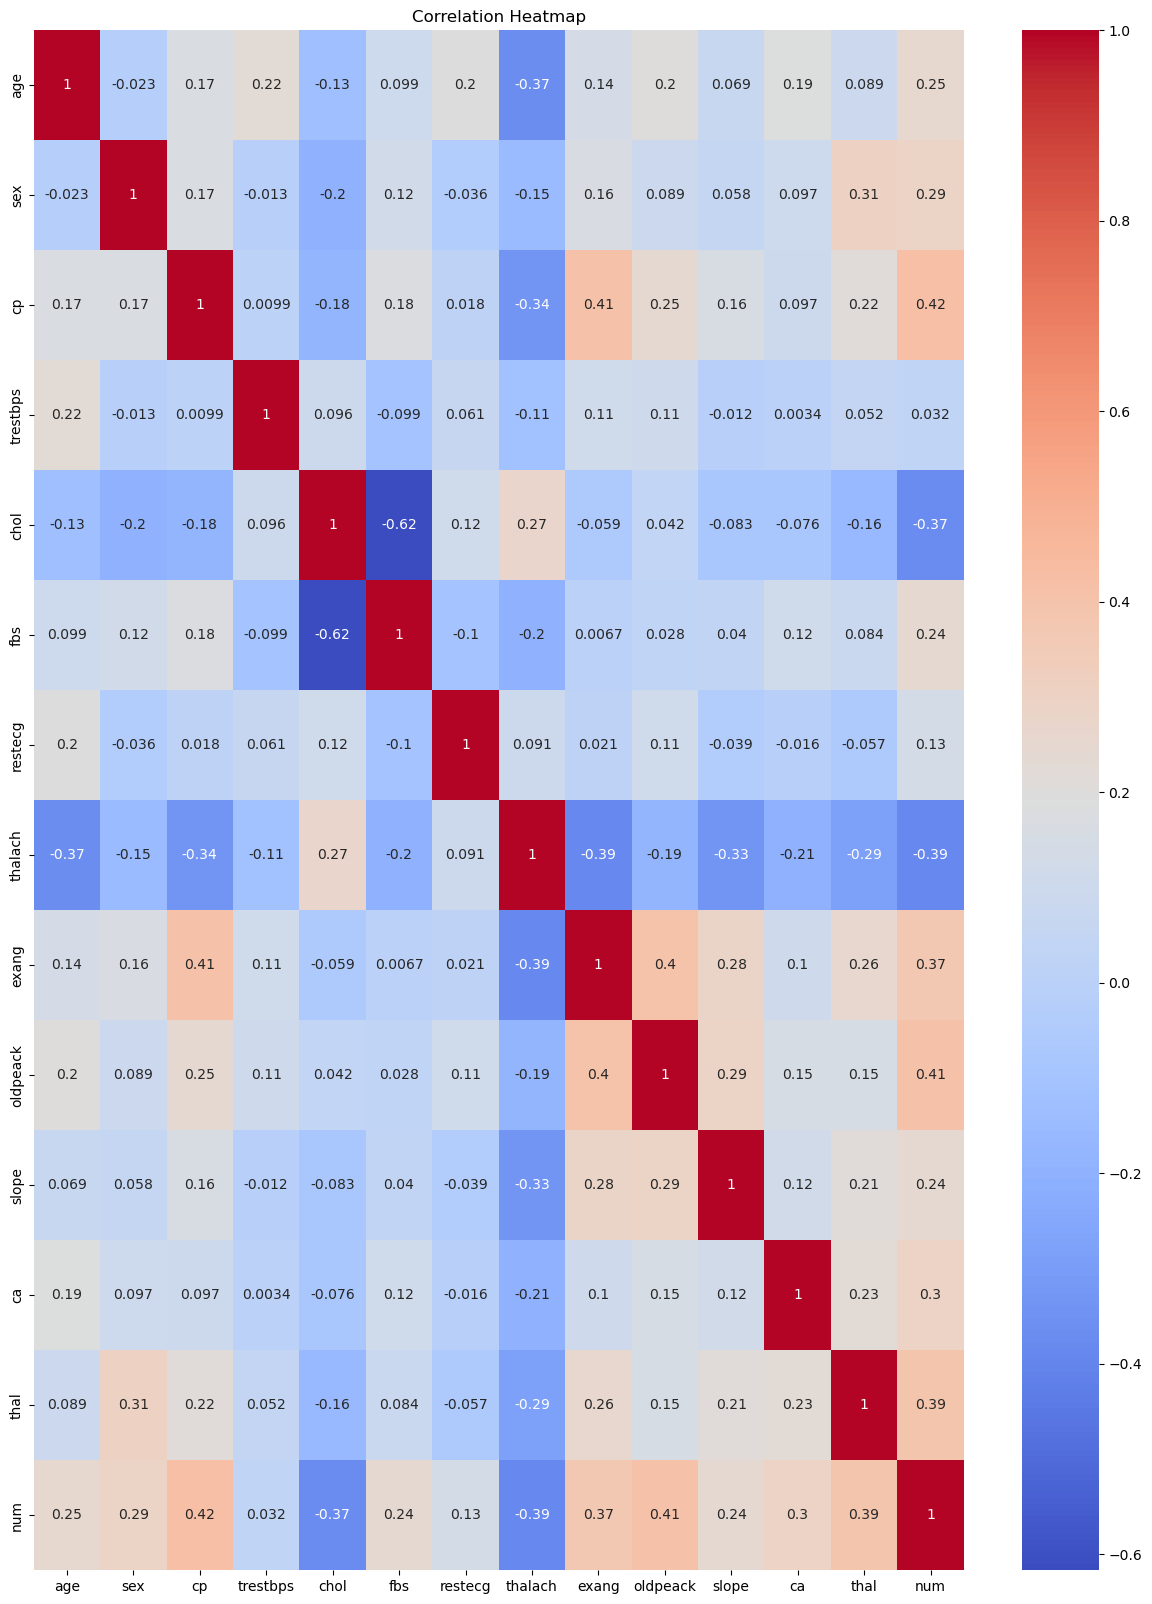

In [17]:

import matplotlib.pyplot as plt
import seaborn as sns
# Compute correlations between features and target
correlations = df.corr()['num'].drop('num')

# Print correlations
print("Correlation with the Target:")
print(correlations)
print()

# Plot correlation heatmap
plt.figure(figsize=(15, 20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## DataTransformation

In [58]:
x=df.drop(['num'],axis=1)
y=df['num']

In [59]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeack,slope,ca,thal,num
0,32.0,1.0,1.0,95.000000,0.0,0.10989,0.000000,127.0,0.0,0.700000,1.000000,0.680782,4.985,1
1,34.0,1.0,4.0,115.000000,0.0,0.10989,0.568245,154.0,0.0,0.200000,1.000000,0.680782,4.985,1
2,35.0,1.0,4.0,131.804742,0.0,0.10989,0.000000,130.0,1.0,0.789636,1.701754,0.680782,7.000,3
3,36.0,1.0,4.0,110.000000,0.0,0.10989,0.000000,125.0,1.0,1.000000,2.000000,0.680782,6.000,1
4,38.0,0.0,4.0,105.000000,0.0,0.10989,0.000000,166.0,0.0,2.800000,1.000000,0.680782,4.985,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,52.0,1.0,4.0,140.000000,266.0,0.00000,0.000000,134.0,1.0,2.000000,2.000000,0.680782,4.985,1
289,52.0,1.0,4.0,160.000000,331.0,0.00000,0.000000,94.0,1.0,2.500000,1.701754,0.680782,4.985,1
290,54.0,0.0,3.0,130.000000,294.0,0.00000,1.000000,100.0,1.0,0.000000,2.000000,0.680782,4.985,1
292,58.0,0.0,2.0,180.000000,393.0,0.00000,0.000000,110.0,1.0,1.000000,2.000000,0.680782,7.000,1


In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [61]:
scaler=StandardScaler();
x_train=scaler.fit_transform(x_train);
x_test=scaler.transform(x_test)

## Logistic Regression

In [62]:
regressor=LogisticRegression()

In [63]:
regressor.fit(x_train,y_train)

LogisticRegression()

In [64]:
y_pread=regressor.predict(x_test)

In [65]:
print(classification_report(y_test,y_pread))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88        91
           1       0.57      0.68      0.62        56
           2       0.12      0.07      0.09        15
           3       0.20      0.20      0.20        15
           4       0.00      0.00      0.00         9

    accuracy                           0.67       186
   macro avg       0.35      0.37      0.36       186
weighted avg       0.61      0.67      0.64       186



C:\Users\user\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [66]:
print(accuracy_score(y_test,y_pread))

0.6666666666666666


## KNN

In [67]:
n_model=KNeighborsClassifier();


In [68]:
n_model.fit(x_train,y_train);
y_pred=n_model.predict(x_test)

In [69]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83        91
           1       0.58      0.64      0.61        56
           2       0.00      0.00      0.00        15
           3       0.40      0.27      0.32        15
           4       0.00      0.00      0.00         9

    accuracy                           0.66       186
   macro avg       0.35      0.36      0.35       186
weighted avg       0.59      0.66      0.62       186



C:\Users\user\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# print(tn,fp,fn,tp)

In [ ]:
# a=accuracy_score(y_test,y_pred)
# # accuracy =  (TP + TN) / (TP + TN + FP + FN)
# a

In [ ]:
# precision_score(y_test, y_pred)
# # precision = TP / (TP + FP)

In [ ]:
# recall_score(y_test, y_pred)
# # recall = TP / (TP + FN)

In [ ]:
# # f1_Score = 2 * (precision * recall) / (precision + recall)
# f1_score(y_test,y_pred)

In [ ]:
# # print(confusion_matrix(y_test,y_pread))
# tn,fp,fn,tp = confusion_matrix(y_test,y_pred).ravel()